
# Book Recommendation System Project

### Team Members: Aditya, Jainam, TzuHung.

## Introduction

This project aims to develop a sophisticated book recommendation system leveraging the extensive Goodbooks-10k dataset. The primary goal is to enhance the reading experience by providing personalized book recommendations through a dual-component system. This system comprises two main modules: a user-based recommendation engine and an item-based recommendation engine. By employing advanced collaborative filtering techniques, the project seeks to significantly improve user engagement and satisfaction with tailored book suggestions.

## Objectives
Creating Item-Based Recommender System as well as User-Based Recommender Systems using collaborative filtering method to generate book recommendations based on a particular item as well as the user.

## Key Findings
We successfully developed item-based and user-based recommender systems leveraging the K-Nearest Neighbor (KNN) algorithm. Through careful preprocessing, we refined our datasets to focus on users who have provided 50 or more ratings and books that have received significant attention, ensuring the recommendations' relevance and reliability. The core of our system lies in creating a sparse matrix from user ratings, enabling efficient computation of nearest neighbors. By fitting the KNN model into this matrix, we established a foundation for making personalized book recommendations. 
Our system uniquely addresses the challenge of scalability and accuracy in collaborative filtering by selecting a subset of users and items that contribute most to the recommendation process. The use of Adjusted Cosine Similarity further refines the model by mitigating the impact of varying rating scales among different users, enhancing the quality of recommendations.




## Methodology

### Data Collection
We chose Goodbooks – 10k as our dataset from kaggle. It not only contains the necessary attributes we need but also provides enough data for training the model. Below are a few columns from our dataset.

### Data Preprocessing
**Preprocessing Books Data**
Selection and Renaming: From the books_dataset, you selected relevant columns: ISBN, Book-Title, Book-Author, Year-Of-Publication, and Publisher. These columns were then renamed to isbn, title, author, year, and publisher for consistency and ease of access in subsequent operations.
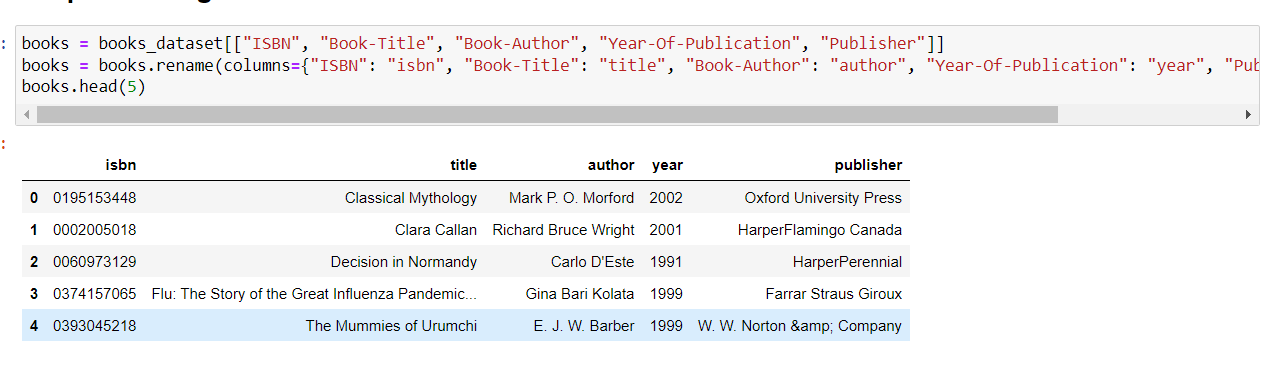

**Preprocessing Ratings Data**
Renaming: The ratings_dataset was processed by renaming its columns to user_id, isbn, and rating, aligning the column names with their respective content and ensuring uniformity across the datasets.
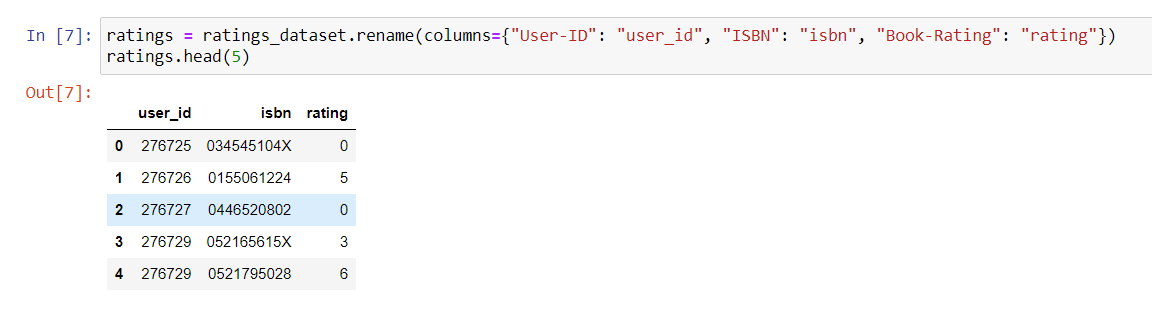

**Preprocessing Users Data**
Renaming and Shape Inspection: Similarly, users_dataset columns were renamed to user_id, location, and age. You also inspected the shape of the users dataset to understand its dimensions.
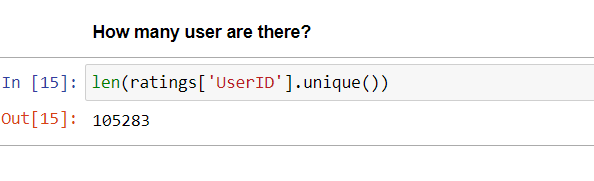

**Null Value Inspection:** You checked for null values or missing data in the books dataframe using a combination of isnull(), empty, and isna() methods, summed across the dataframe to identify any issues with the data quality.
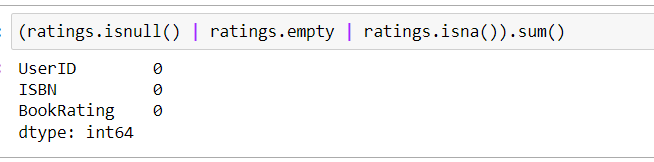

**Initial Data Overview:** Using books.head(10), you displayed the first 10 entries of the books dataframe to get an insight into the data's structure and content.
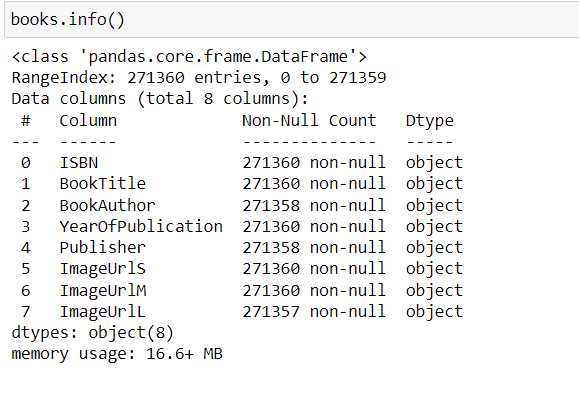

**Dataframe Information:** The books.info() method was used to obtain a concise summary of the dataframe, providing details on the number of entries, the data type of each column, and memory usage, which is crucial for understanding the dataset's structure and identifying any potential issues requiring further cleaning or transformation.

**Dataset Size:** The shape of the books dataframe was inspected using books.shape, determining the total number of books (rows) and attributes (columns) available for analysis and recommendation.

**Filtering Users Based on Review Count**

*Calculating User Review Counts:* The first step involves grouping the ratings dataframe by UserID and counting the number of ISBNs (books) rated by each user. This produces a series (ratings_count) where each index represents a unique UserID, and the corresponding value is the number of books they've rated.

*Identifying Active Users:* You then filter this series to identify "active users" - defined as users who have rated more than 50 books. This threshold helps focus the recommendation system on users who have provided enough data to inform meaningful recommendations. The .index.tolist() method extracts the UserIDs of these active users into a list (active_users_id).

*Filtering Active Users:* With the list of active user IDs, you filter the original ratings dataframe to include only the rows where the UserID is in the active_users_id list. This results in a new dataframe (active_users) containing only the ratings from users who have reviewed more than 50 books.
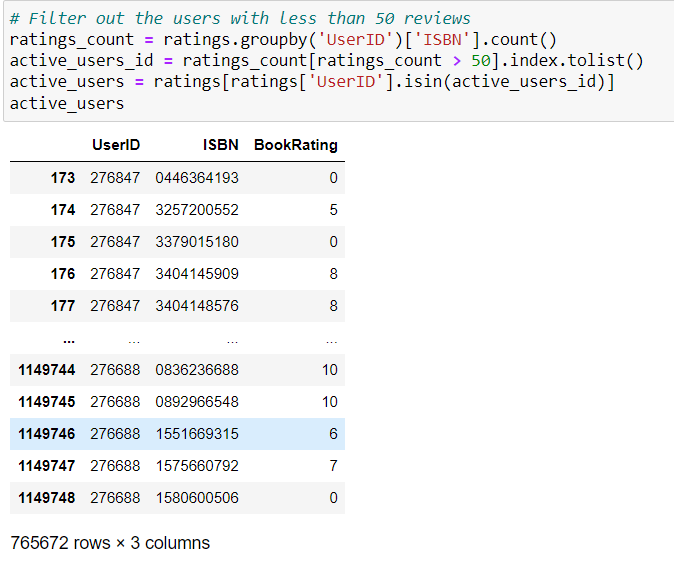

**Filtering Books Based on Ratings Count**

*Calculating Book Ratings Counts:* Similar to users, you group the active_users dataframe by ISBN and count the number of users (UserID) who have rated each book. This yields a series (item_ratings_count) where each index represents an ISBN, and the value is the count of users who have rated that book.

*Identifying Popular Books:* Books with more than 50 ratings are considered "popular." You filter the item_ratings_count series to identify these books, extracting their ISBNs into a list (popular_items_id) of popular books.

*Filtering for Popular Books:* Finally, you filter the active_users dataframe to include only the rows where the ISBN is in the popular_items_id list, resulting in a new dataframe (popular_ratings). This dataframe now contains ratings data only for books that have been rated by more than 50 users and only includes ratings from active users.

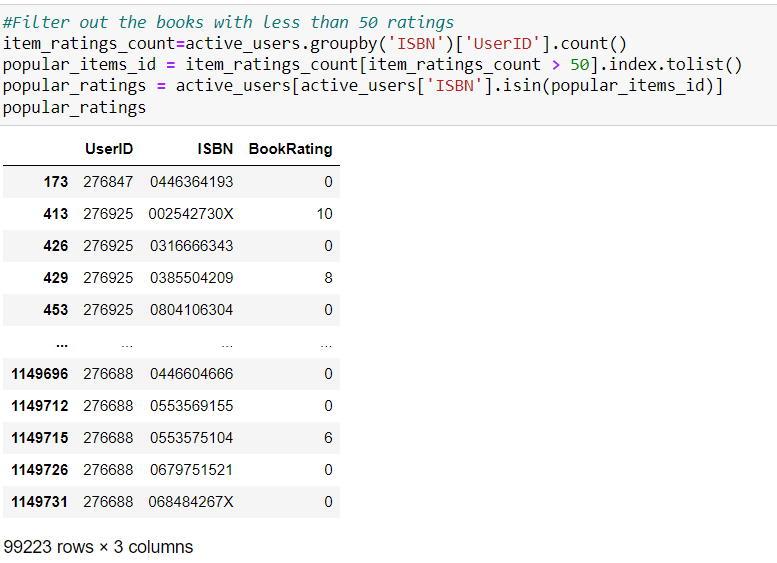

### Data Visualizations

**Year of Publication Histogram:** This plot likely illustrates the distribution of books according to their year of publication. The histogram shows a clear trend of increasing publication volume over the years, peaking in the most recent years shown in the dataset. This could be due to several factors, including the increasing ease of publishing and the growth of the book industry. The peak in recent years suggests that the dataset includes a lot of contemporary books, which could be indicative of user preferences leaning towards newer titles.
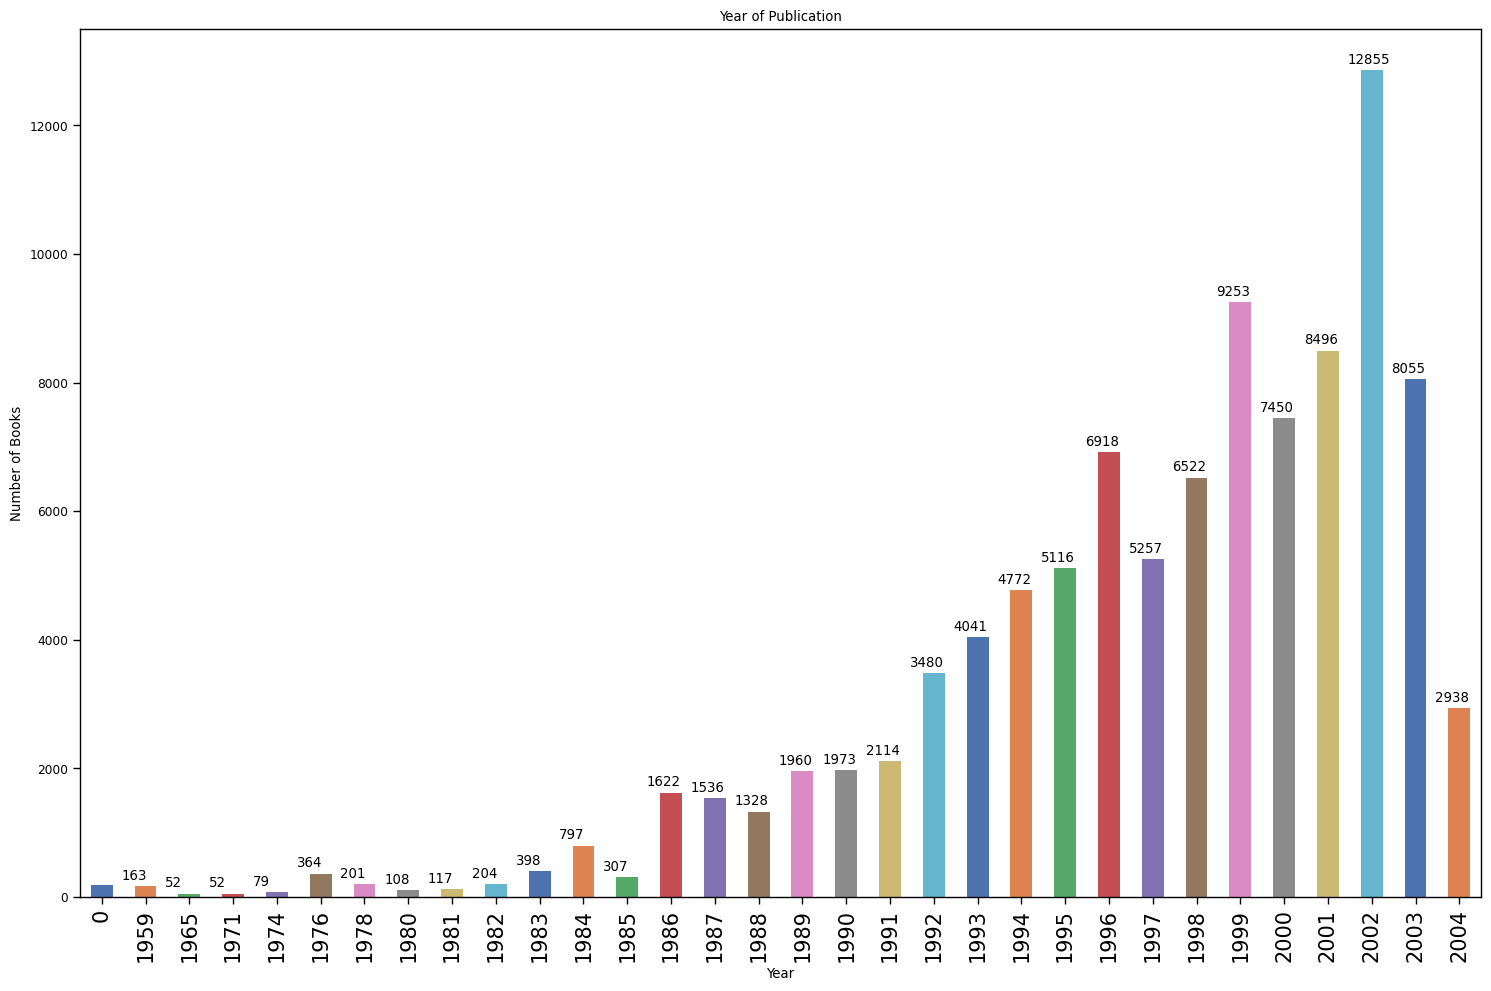

**Most Rated Books Bar Chart:** The horizontal bar chart probably displays the most rated books within the dataset. The length of each bar corresponds to the number of ratings each book has received, which could be indicative of popularity or reader engagement. The presence of titles such as "The Da Vinci Code" and "The Lovely Bones" suggests the dataset captures well-known bestsellers that are likely to be recommended frequently by the system.
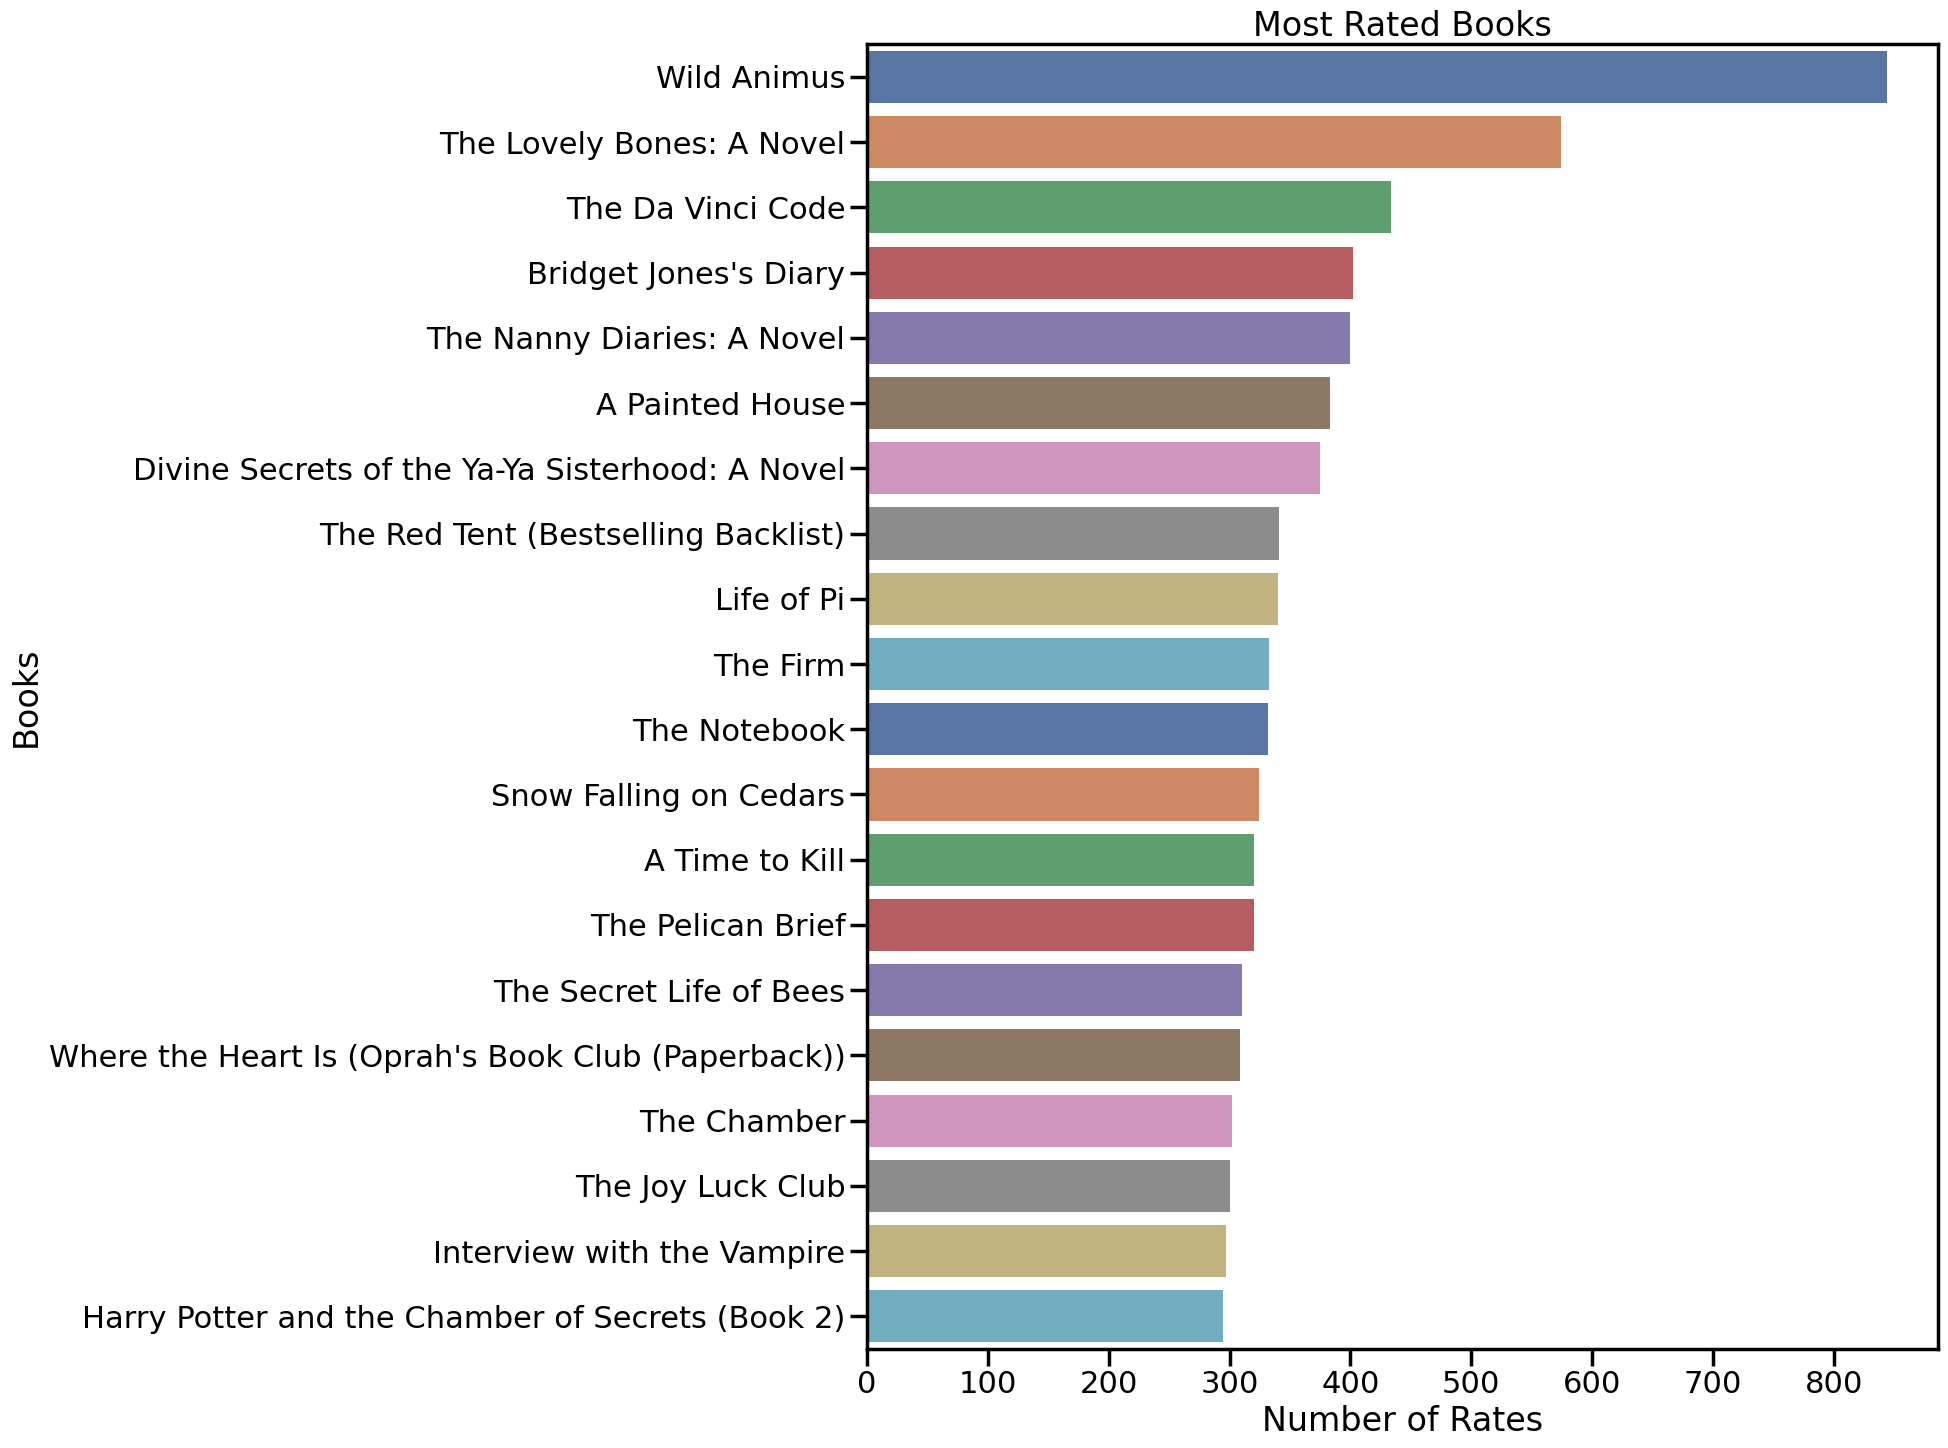

**Age of Users Histogram:** This plot represents the distribution of users' ages. The histogram is skewed to the right, with a peak around the 20-30 age range. This suggests that a significant portion of users providing ratings are young adults, which may impact the types of books that are frequently rated and recommended within the system. The long tail towards older ages indicates the system also needs to cater to a wide range of age groups.
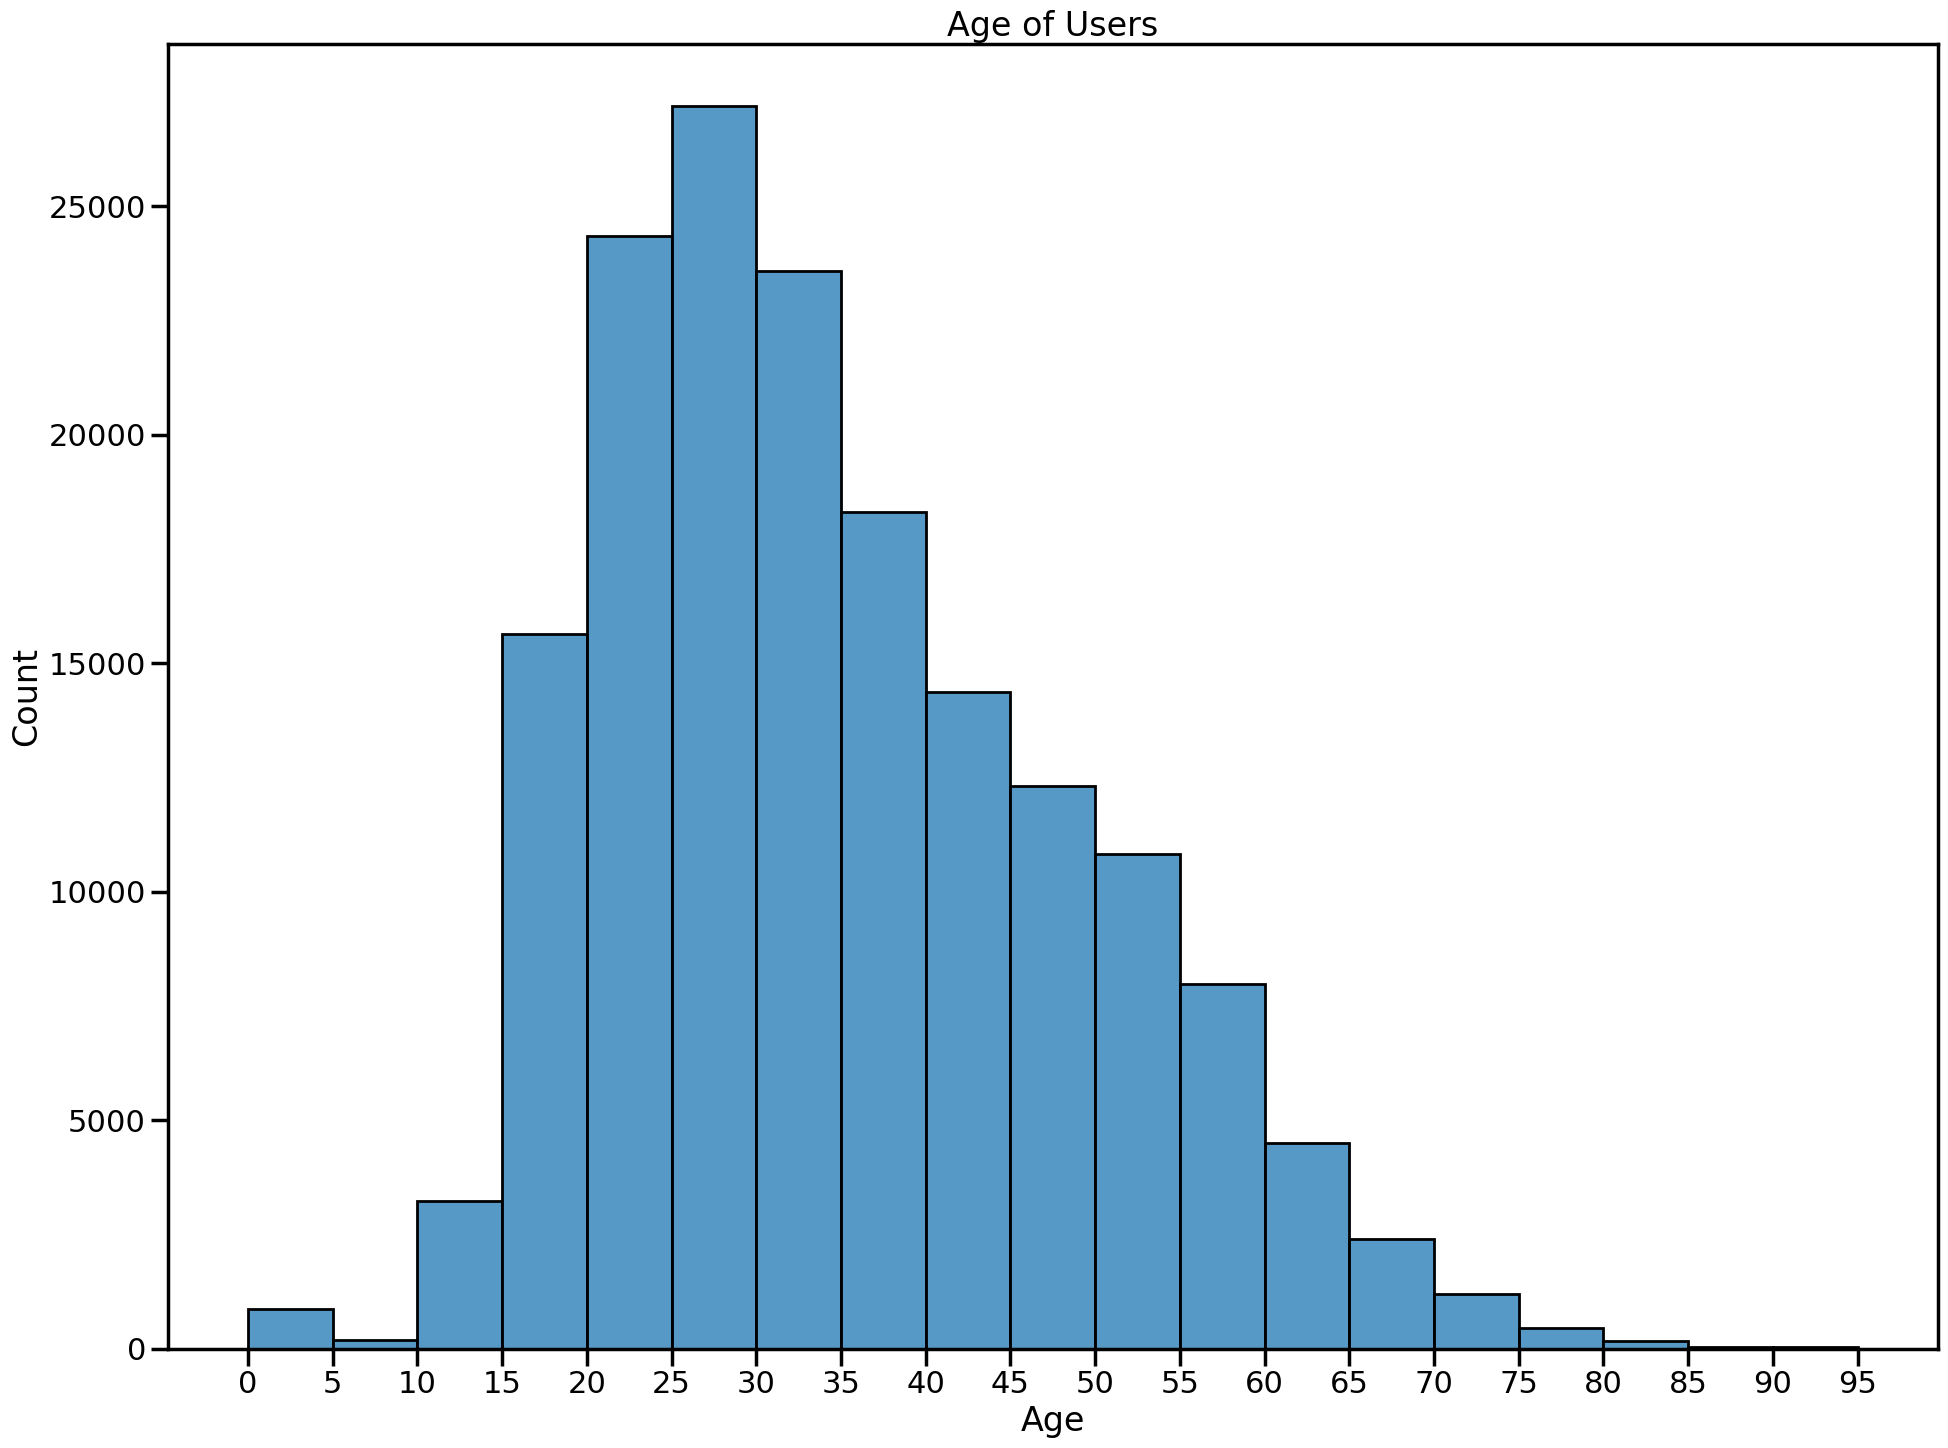

**Rating Distribution Bar Chart:** This chart shows the distribution of ratings across the dataset. It's clear that a rating of "0" is the most common, which could indicate a large number of unrated books or a placeholder for missing ratings. The ratings then distribute across the scale from 1 to 10, with higher numbers like 7, 8, and 10 having notable peaks. This suggests users are more likely to rate books they feel positively about, and the system should take this potential rating bias into account when making recommendations.
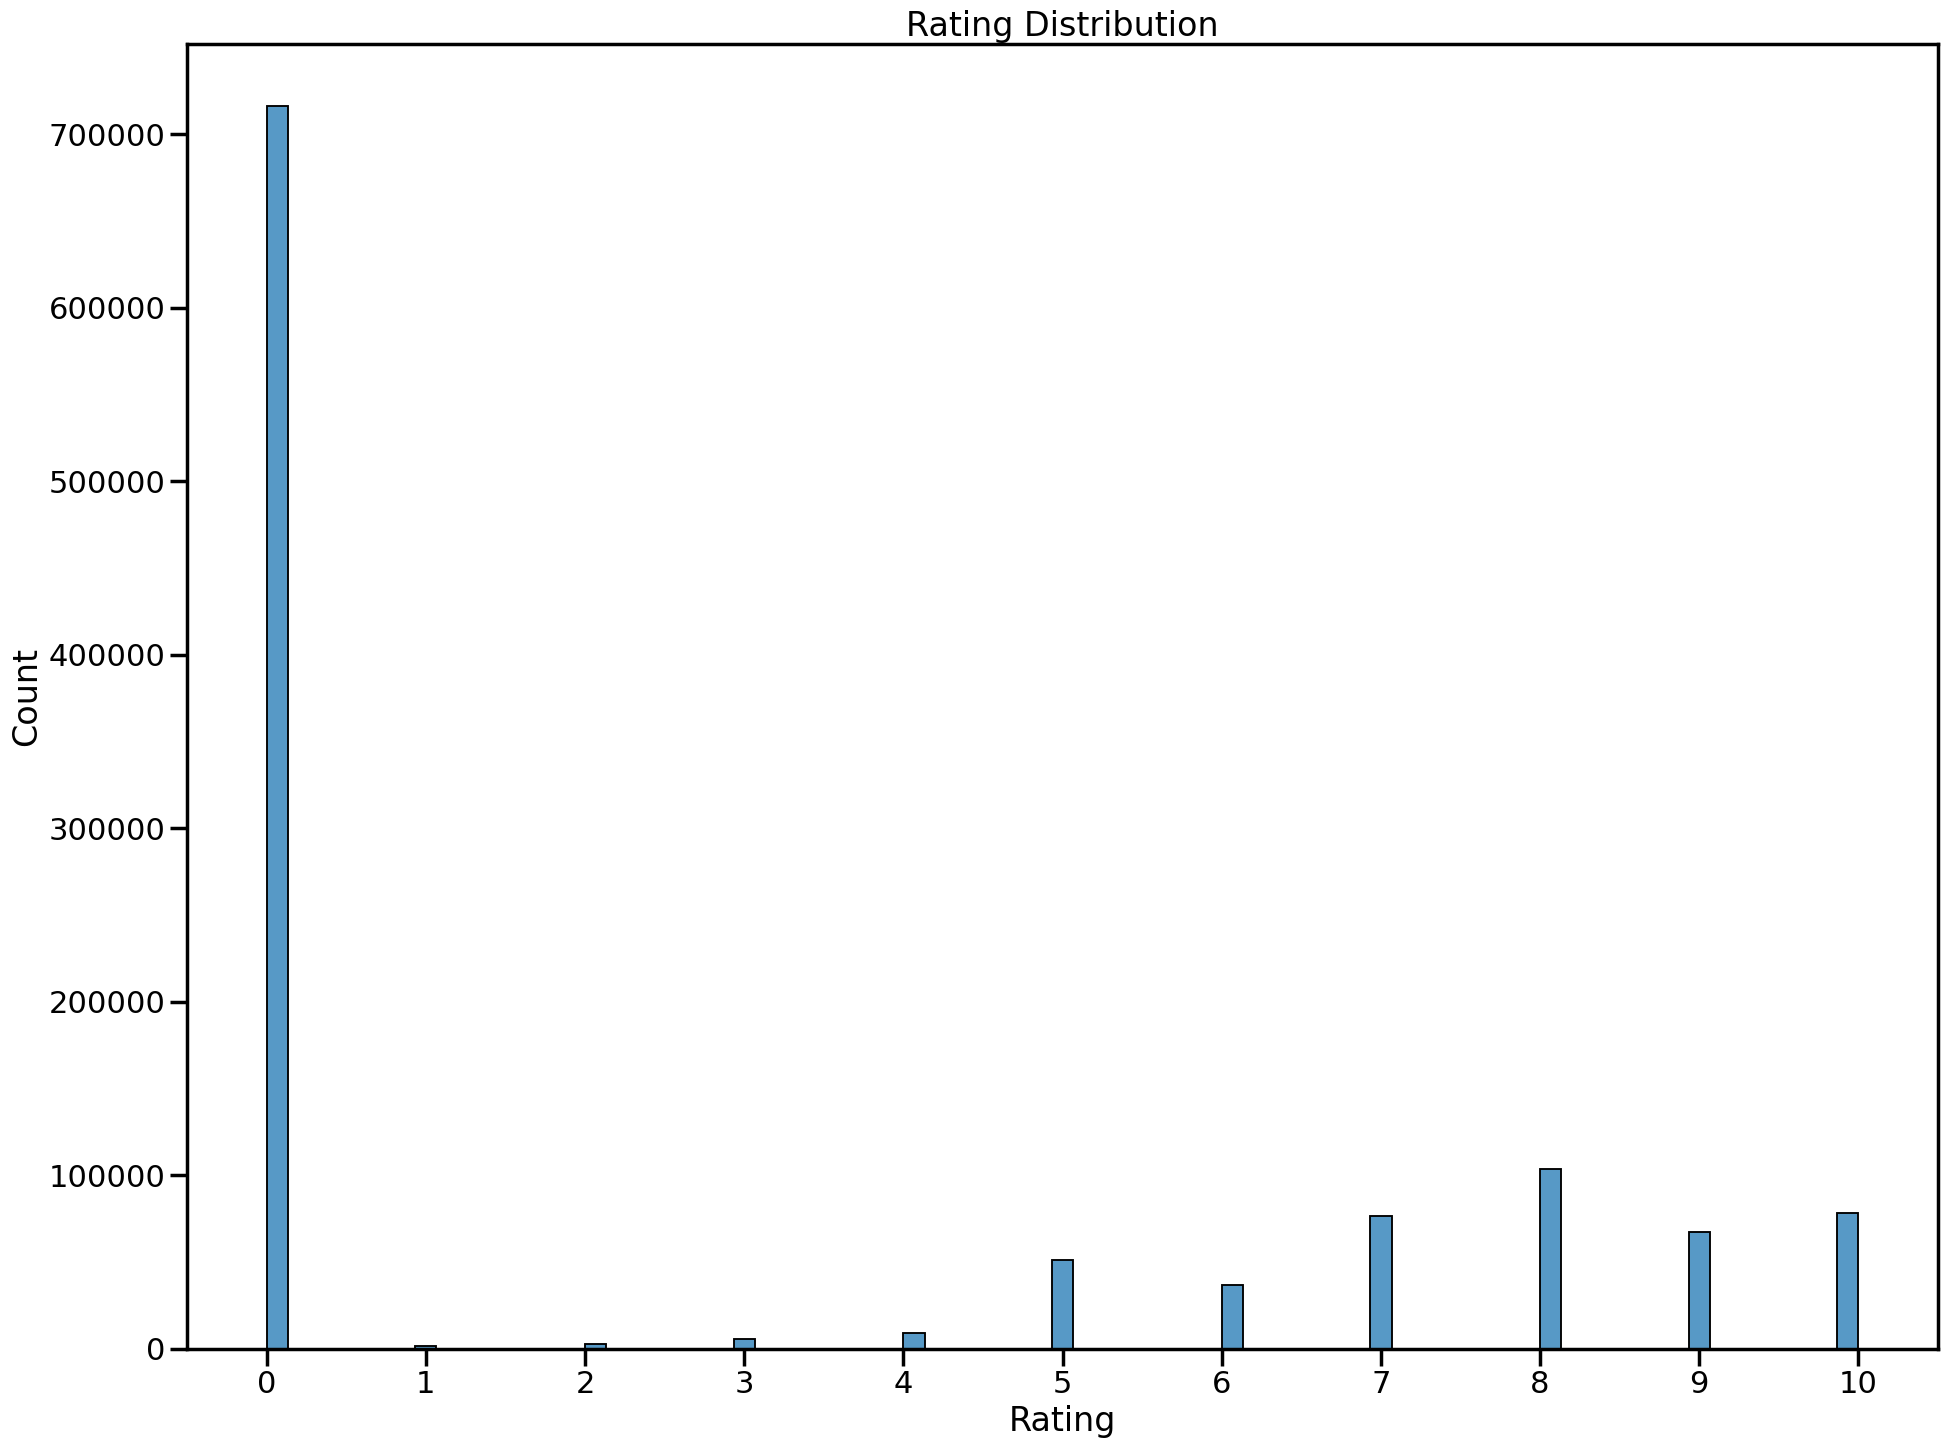


## Item-Based Collaborative Filtering

**Pivot Table Creation:** The popular_ratings DataFrame is pivoted to create a matrix where rows represent individual books (ISBN) and columns represent unique users (UserID). The values in this matrix are the book ratings (BookRating).

**NaN Handling:** Since not all users have rated all books, many entries in this matrix are missing, which are filled with zeros. This is a standard approach in collaborative filtering to handle missing data.
Index Capturing: After pivoting, the list of UserIDs and ISBNs are stored, probably for later reference when making predictions or analyzing the model's performance.

**Printing the Shape:** The shape of the pivoted table is printed to understand the dimensions of the data, which informs how many books and users are being considered for the recommendation system.

### Model Training and Prediction for an Item-Based Recommender System:
**Data Split:** The pivoted data is split into training and testing sets with an 80-20 ratio, a common practice for evaluating the performance of machine learning models.

**Cosine Similarity:** This metric is used to calculate the similarity between two items (books) based on user ratings. It's a measure of the cosine of the angle between two vectors in a multi-dimensional space where each dimension represents a user's rating for an item.

**Adjusted Cosine Similarity:** Similar to Cosine Similarity but adjusted for user bias by subtracting the user's average rating from each rating they've given. This can help correct for users who tend to rate more harshly or more leniently than others.

**RMSE Calculation Function (calculate_rmse):** This function calculates the Root Mean Square Error (RMSE), a standard measure for evaluating the accuracy of a predictive model. Lower RMSE values indicate better performance. It compares predicted ratings to actual ratings, using either the regular or Adjusted Cosine Similarity.

**Similarity Prediction Function (similar_items_prediction):** This function computes the similarities between items using either the Cosine or Adjusted Cosine method. It also retrieves the k-nearest neighbors to a given item, which is essential for making predictions.

**Rating Prediction Function (predict_ratings):** Given the similarities between items and the indices of similar items, this function predicts the rating a user might give to an item based on the weighted average of the ratings they've given to similar items.


### Calculating RMSE:
RMSE is used to evaluate the model's performance, indicating how closely the model's predicted ratings match the actual user ratings.
The model calculates RMSE for a range of k values (1 to 20), where k represents the number of nearest neighbors considered in the KNN algorithm. A loop runs the calculate_rmse function for each k, storing the results.
Two plots are generated, one showing RMSE for the standard Cosine similarity and the other for the Adjusted Cosine similarity. These visualizations help determine the optimal k value based on the error rates.
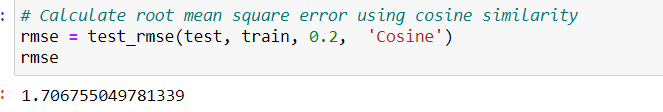
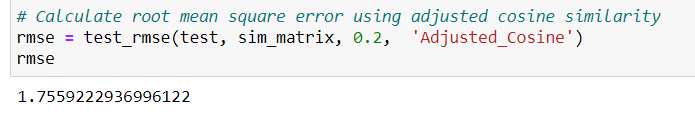

### Testing the Model:
A function test_rmse is defined to compute RMSE on the test set. The test involves finding the indices of items rated by each user, withholding some ratings as test data, and predicting these withheld ratings using the similarity measures.
Predictions are weighted sums of the ratings given to similar items by the user, normalized by the sum of the similarities.

### Generating Recommendations:
Books information is re-integrated into the DataFrame to prepare for recommendation generation.
The get_recommendations function takes a book title and returns the top k similar books. It uses either standard Cosine similarity or Adjusted Cosine similarity to find similar items. The recommendations are based on the similarity between the query book and other books in the dataset.
An additional function display_recommends formats and displays the recommended books along with their cover images, authors, publication years, and publishers.

This is the example of recommendations for the book 'The Da Vinci Code'.

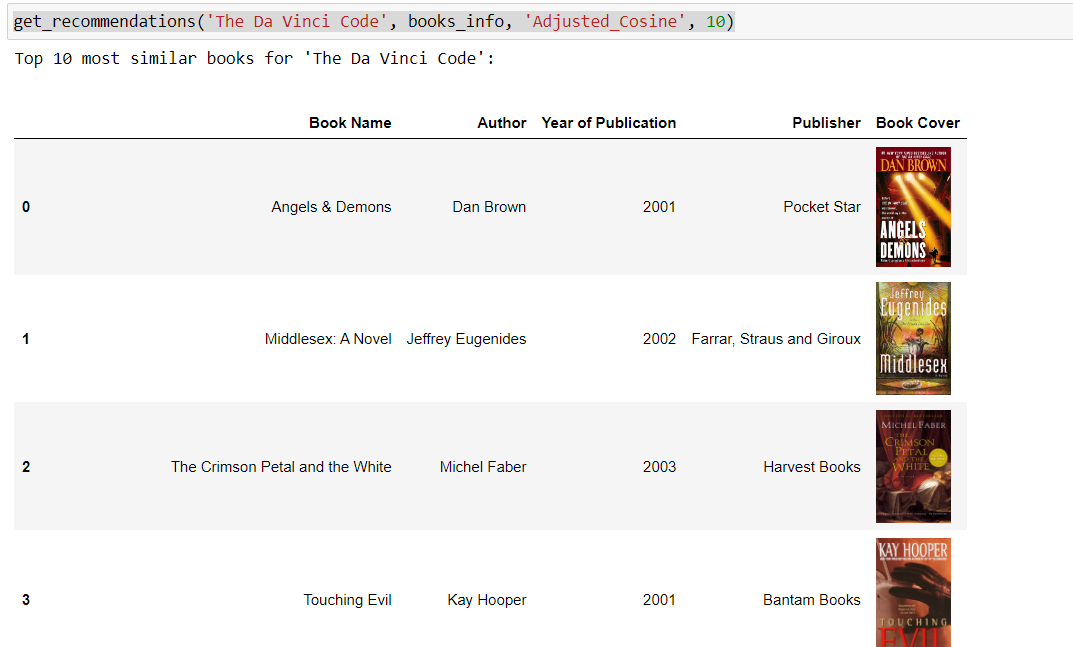

This is the example of recommendations for the book "Touching Evils'.

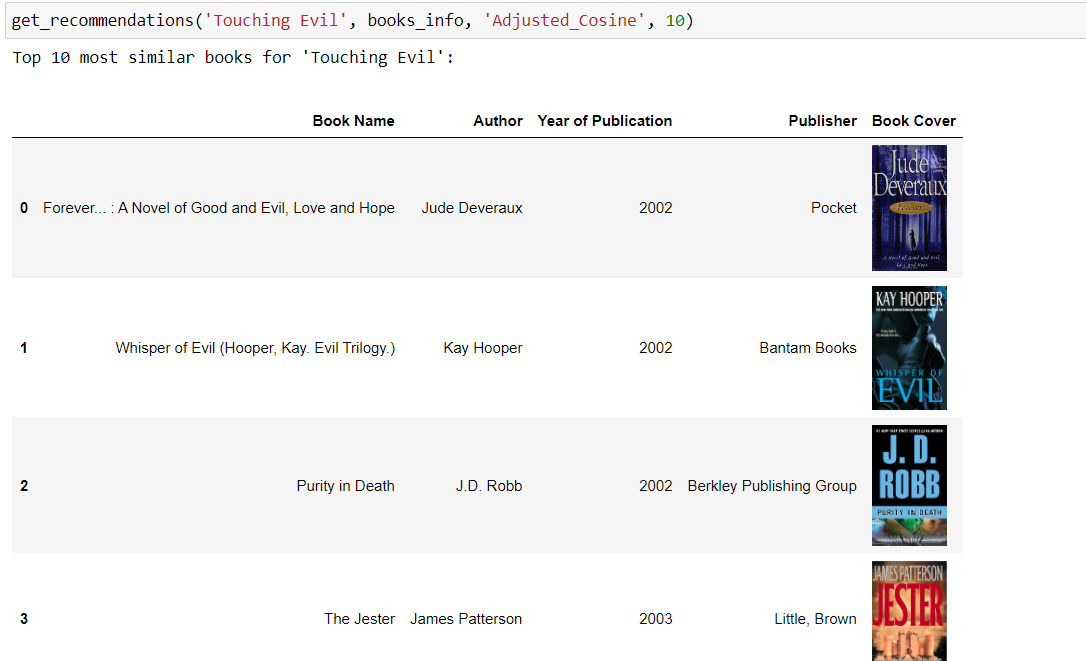

### Conclusions and Future Work:
The system shows acceptable performance in terms of RMSE, but the code concludes with suggestions for improvements, such as addressing the sparsity of the dataset using techniques like Singular Value Decomposition (SVD).
Incorporating book metadata into the similarity calculations is suggested to provide more nuanced recommendations across different genres.

Conclusion:
This code segment outlines a sophisticated approach to creating an item-based book recommendation system. By calculating similarities between books based on user ratings, it can provide personalized book suggestions. The recommendation is made more robust by adjusting for user rating biases and evaluating model performance with RMSE. The system is further refined by visualizing error rates against different k values, highlighting the balance between accuracy and complexity.

Here is the link to the notebook:
[Item_Based_Recommender_System](./Item_Based_Recommender_System.ipynb)

## User-Based Collaborative Filtering

### Data Merging and Filtering:

You merge book_rating_data with rating_numbers based on isbn to append the count of ratings each book received to your dataset.
You then filter out books with fewer than 50 ratings to focus on those with more significant user interaction, resulting in ratings_with_count_df.
Duplicate entries are removed from ratings_with_count_df based on user_id and title, ensuring unique user-book interactions.

### Creating a Pivot Table:

A pivot table, ratings_pivot_table, is created from the filtered DataFrame ratings_with_count_df where books with more than 100 ratings are retained. The table pivots on book titles, with user IDs as columns and their corresponding ratings as values.
Missing values are filled with zeros, which is common when dealing with collaborative filtering algorithms that require numerical input and can handle sparse matrices.

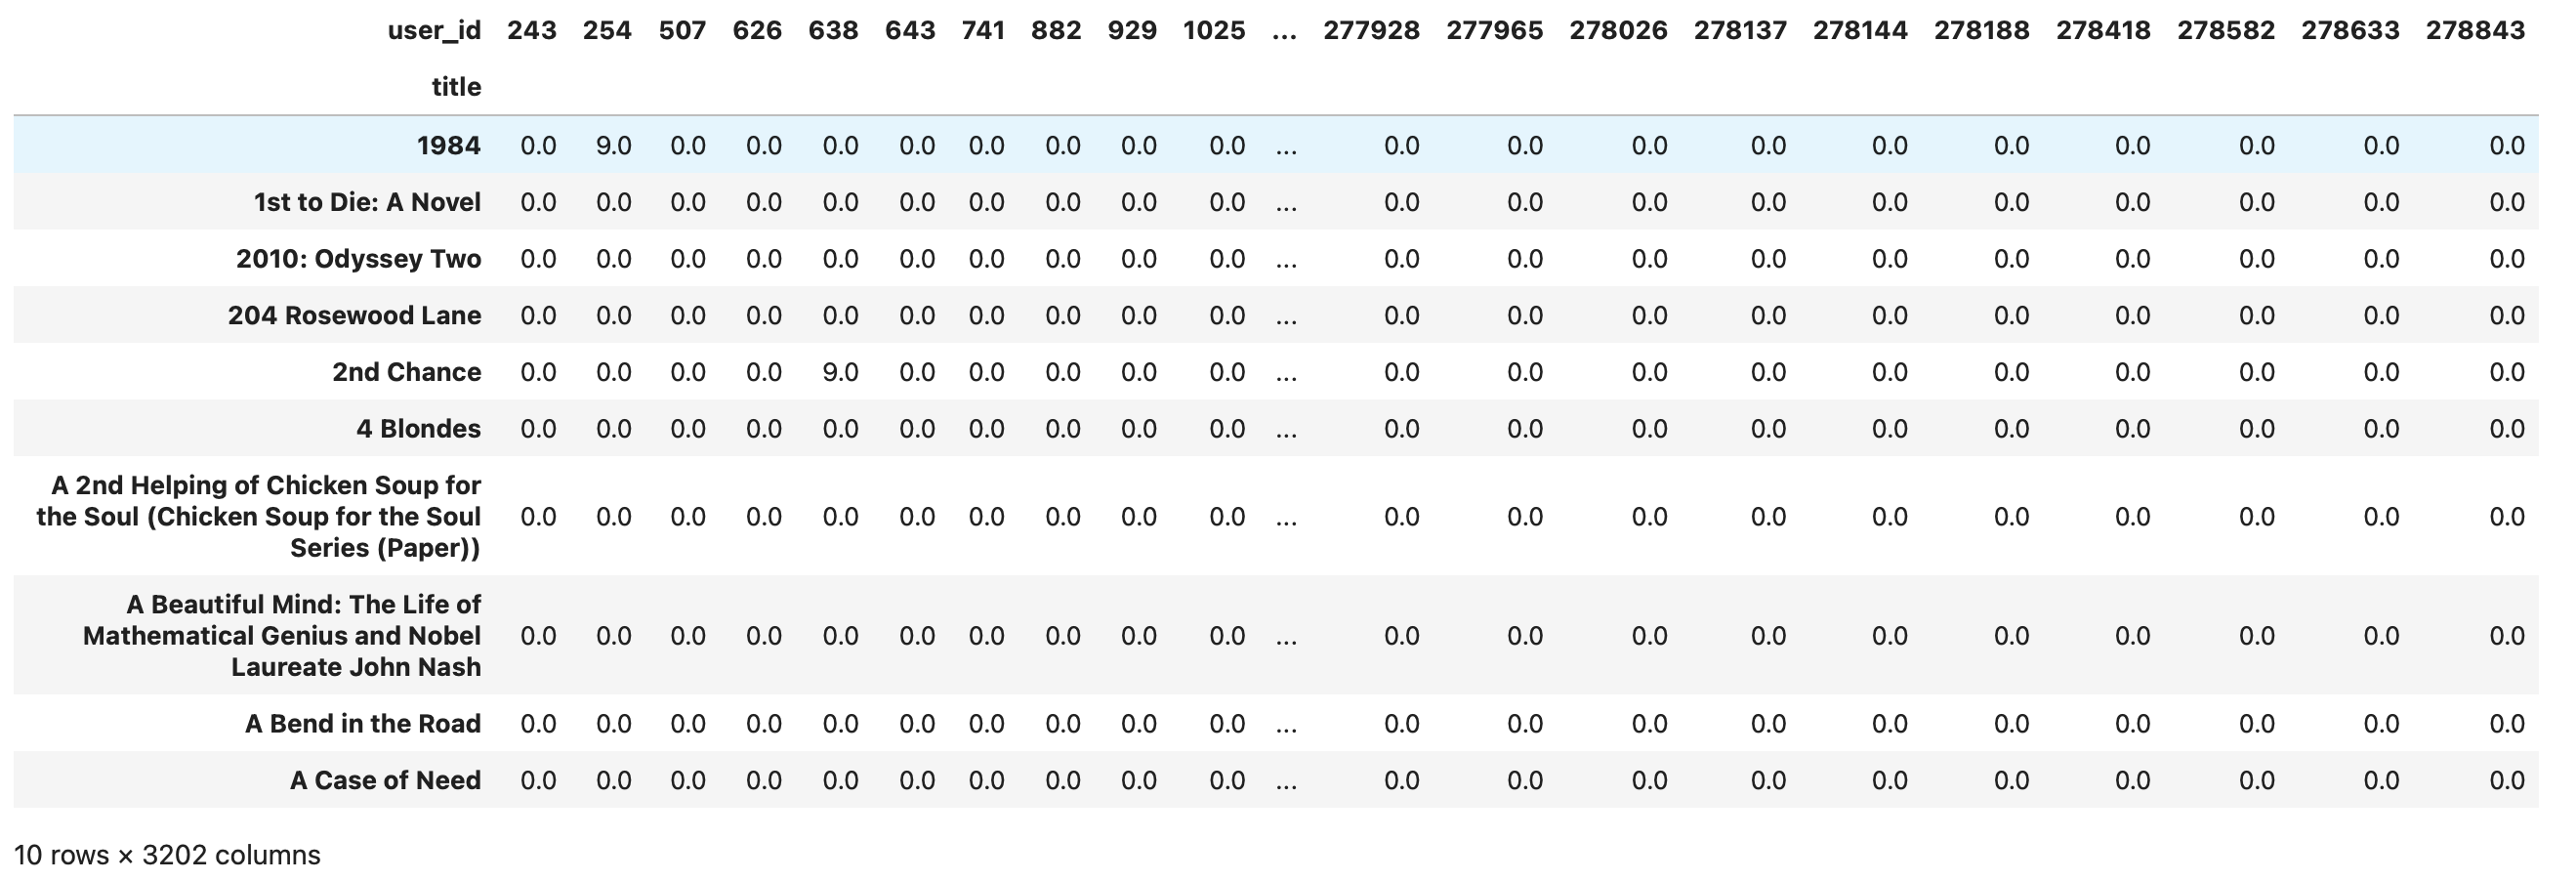

### Sparse Matrix Conversion:

The pivot table is converted into a sparse matrix, rating_sparse, which is an efficient representation that stores only the non-zero elements of the matrix. This is a typical preparation step before fitting the data to a machine learning model.
Model Training with NearestNeighbors:

You utilize the NearestNeighbors algorithm from sklearn to fit the sparse matrix, which effectively trains the model based on user ratings.
NearestNeighbors is a type of unsupervised learning algorithm used for clustering or finding the relationship between points (in this case, users and their ratings).

### Generating Recommendations:

After the model is trained, it is used to find the nearest neighbors for a selected user's ratings. This is done by inputting a user's rating vector and requesting the top 10 nearest neighbors.
The recommendations are books that the nearest neighbors have interacted with, indicating that users with similar tastes and preferences have rated these books, and therefore, the target user might also enjoy them.
Outputting Recommendations:

The recommended book titles are then printed out, providing a list of books suggested by the model based on the similar preferences of users.

Here's the example about how the user-based recommender system will work.

#### Below are the recommendations for user interaction with book : 1984
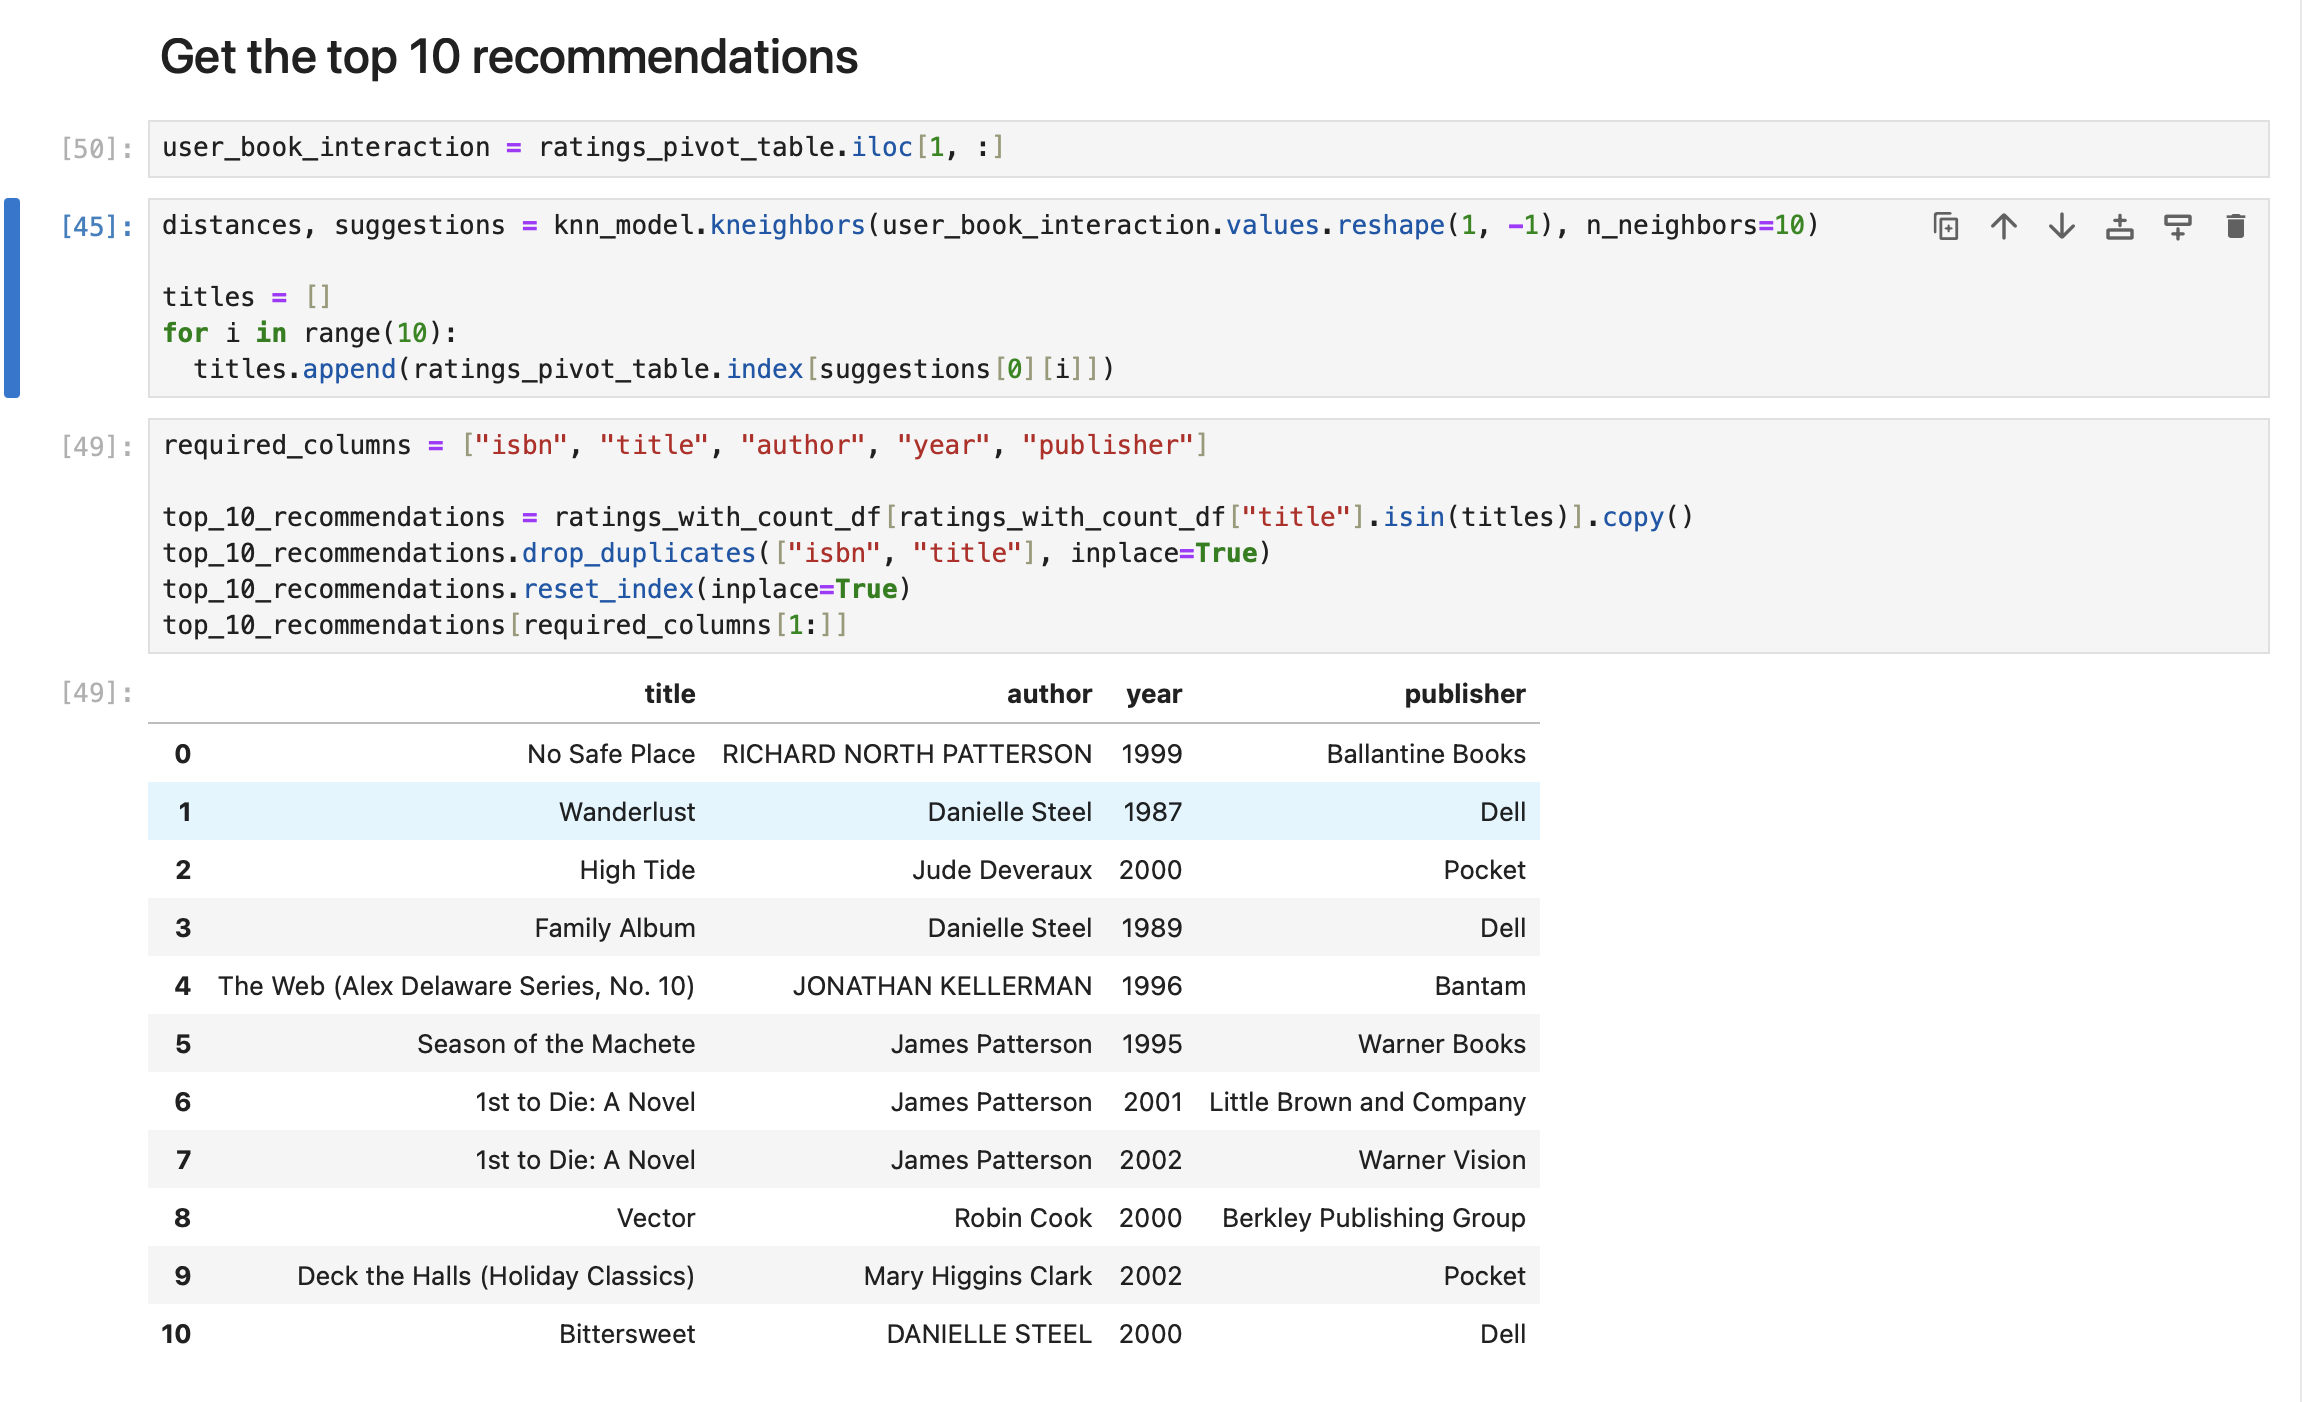

#### Below are the recommendations for user interaction with book : Zoya
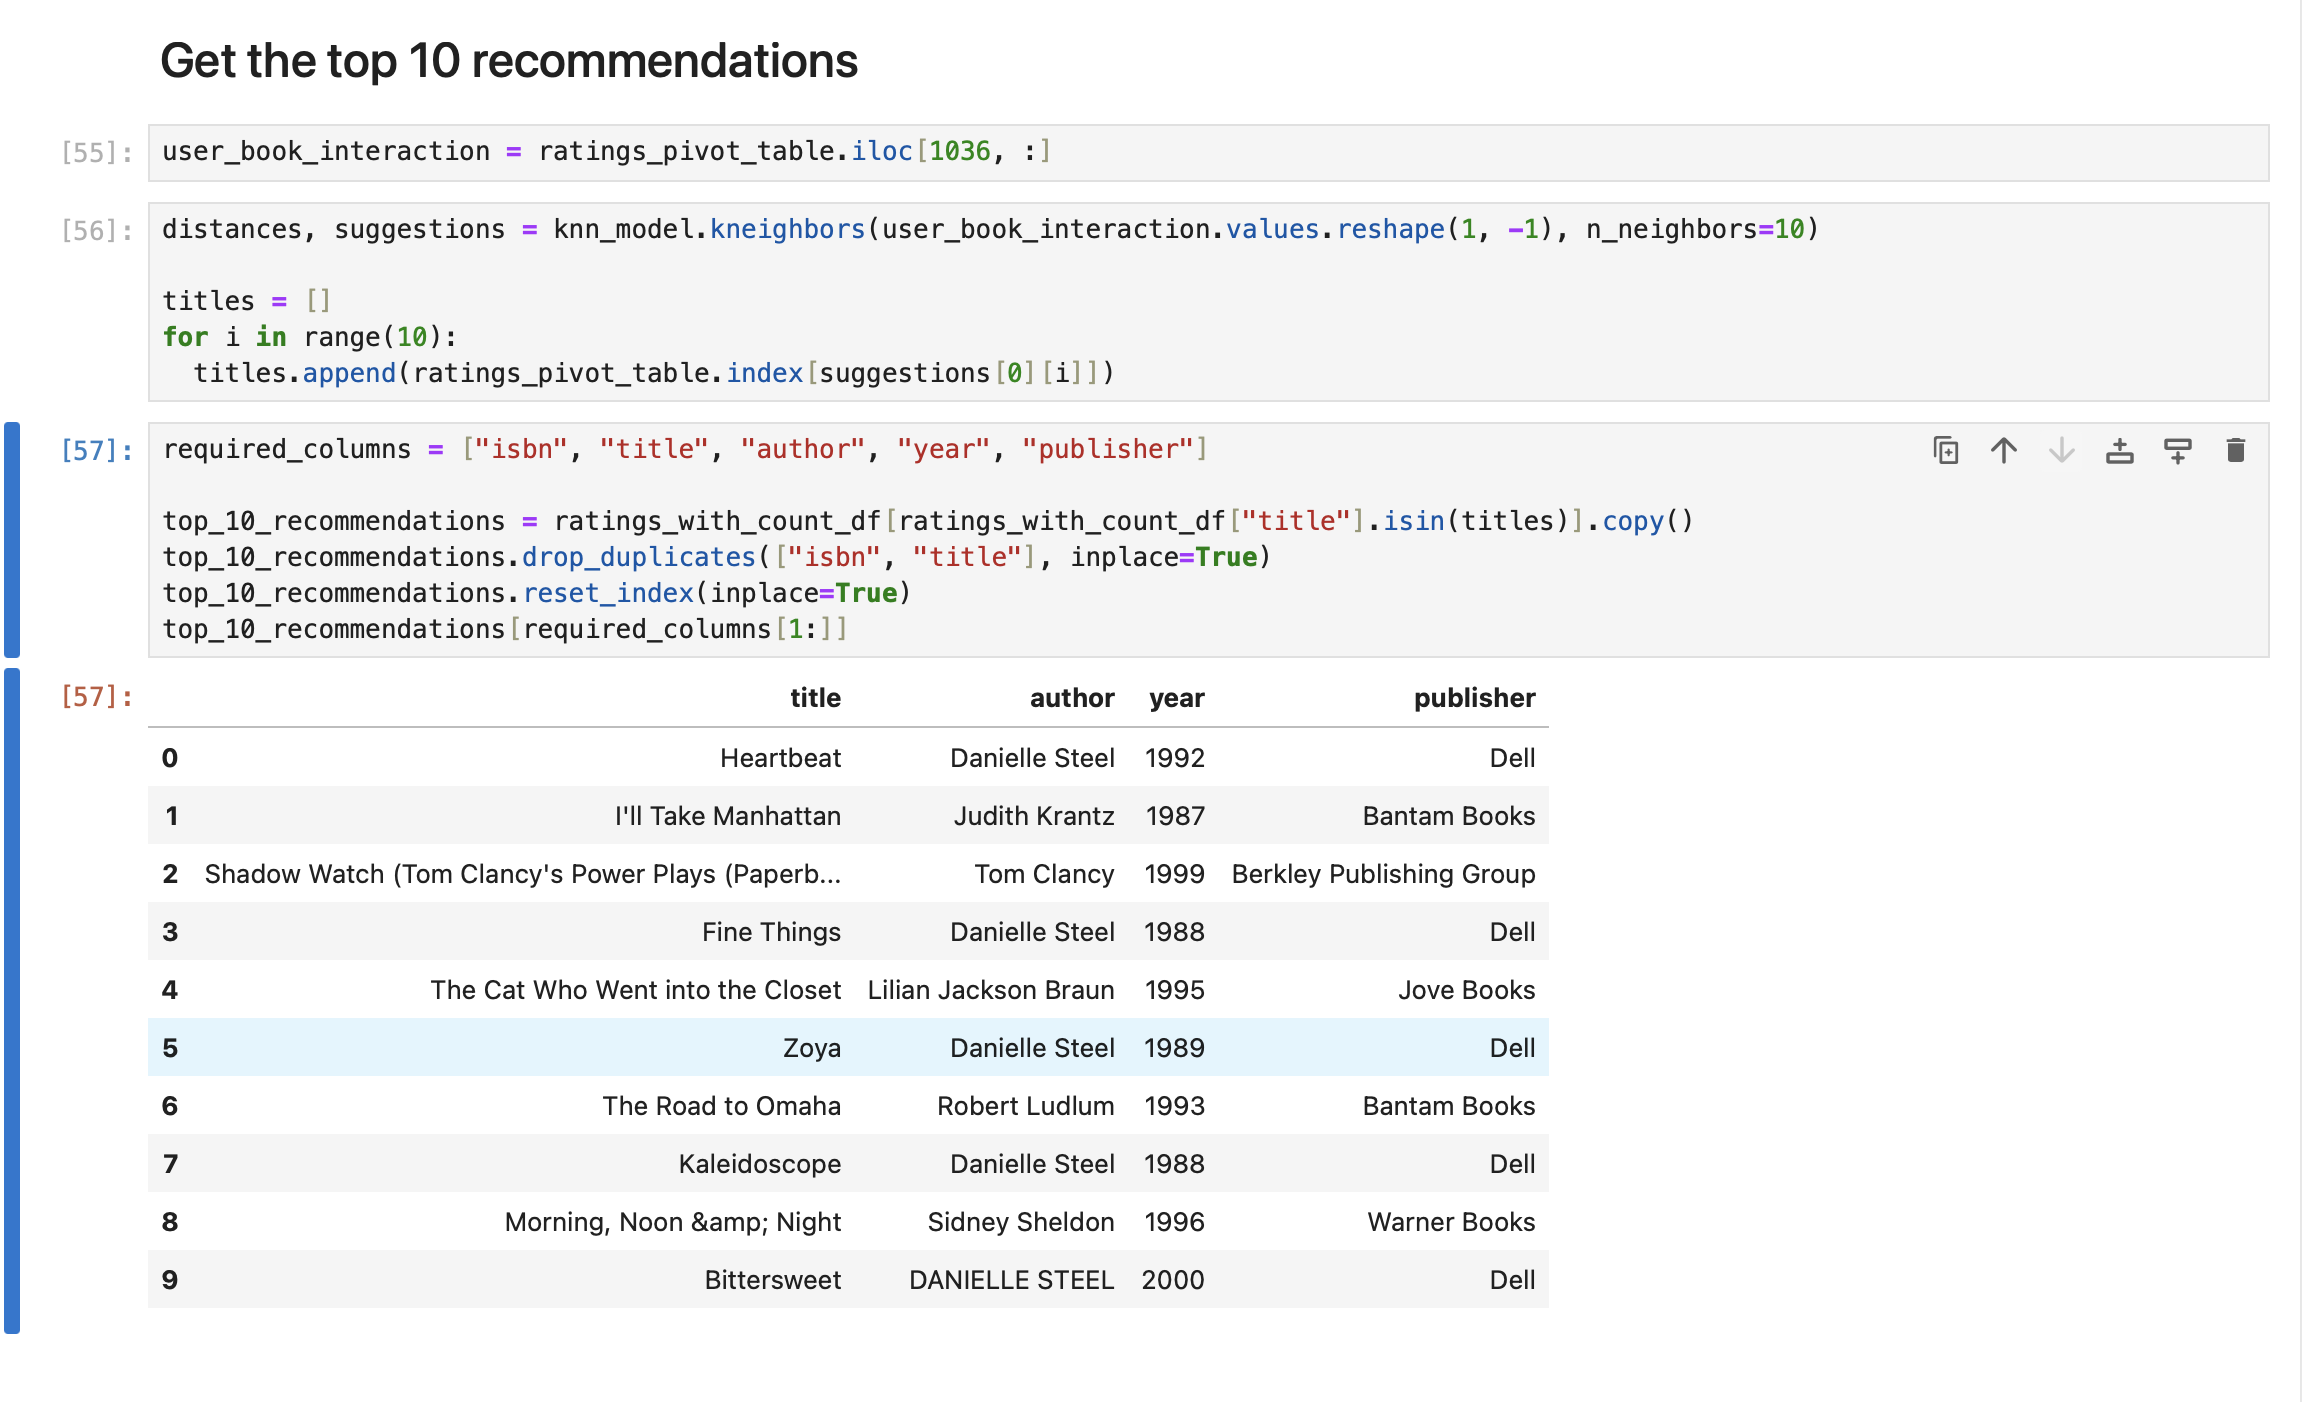


### Conclusion and Future Work:

This project's successful implementation of a user-based book recommendation system highlights the potential of collaborative filtering and the KNN algorithm in delivering personalized content recommendations. Through detailed data preprocessing and strategic model application, the system provides a solid foundation for future enhancements and research in the domain of recommendation systems.

**Future Work:**
Incorporating item features to personalize recommendations beyond user similarities.
Exploring matrix factorization techniques for more complex user-item relationships.
Implementing hybrid approaches that combine user-based and item-based collaborative filtering for a more comprehensive recommendation strategy.

Here is the link to the notebook:
[User_Based_Recommender_System](./User_Based_Recommender_System.ipynb)